In [5]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd
#How are we doing lately

In [6]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [7]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])
df.head()

,A,B,C
2016-07-01 00:00:00,1.069784,-0.941822,-1.176325
2016-07-01 00:00:01,0.290893,2.293057,-0.724833
2016-07-01 00:00:02,-0.808493,0.182461,0.811679
2016-07-01 00:00:03,0.680081,-0.757354,1.748235
2016-07-01 00:00:04,-0.742249,0.778543,-0.134142


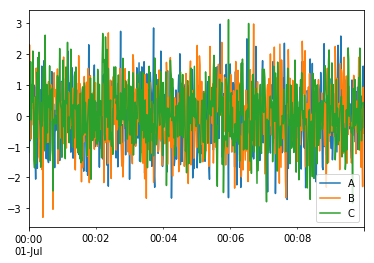

In [8]:
df.plot()

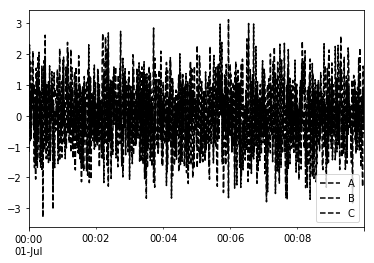

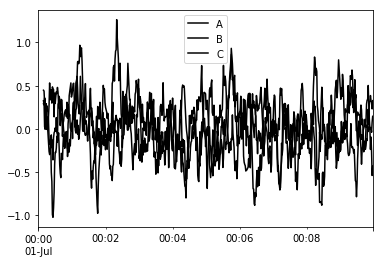

In [9]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [10]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

/Users/anshulgupta/anaconda/envs/python_3.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  


,A,B,C
2016-07-01 00:00:01,0.654375,0.783447,-0.935529
2016-07-01 00:00:02,0.100390,0.555854,-0.273864
2016-07-01 00:00:03,0.275494,0.159180,0.336941
2016-07-01 00:00:04,0.014315,0.318125,0.216049
2016-07-01 00:00:05,0.210849,0.302478,0.395215
2016-07-01 00:00:06,0.341996,0.341310,0.405126
2016-07-01 00:00:07,0.354891,0.335880,0.726606
2016-07-01 00:00:08,0.474392,0.221439,0.703556
2016-07-01 00:00:09,0.530984,0.285409,0.343864


In [11]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [12]:
df.head()

,A,B,C,D
2016-06-06,0.427051,-1.440486,-0.534176,0.597170
2016-06-07,-1.198071,-0.430187,0.521012,1.979000
2016-06-08,1.093574,1.151424,1.311853,0.564007
2016-06-09,0.402272,-1.014415,-0.782174,-0.158347
2016-06-10,0.051544,0.660911,0.227789,-1.167660


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1072d0908>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10786f668>], dtype=object)

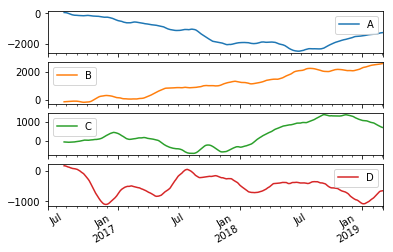

In [13]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [14]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.534244,0.690831,0.517157,0.780463


In [15]:
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
df.expanding(2).sum()

,B
0,NaN
1,1.0
2,3.0
3,3.0
4,7.0


In [16]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,B
1,0.50
2,1.00
3,1.00
4,1.75


In [17]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?
###Exapnding window is the mean of the data whereas rolling window is where we
####give the size of the window calculate upto that point.So Expanding window
###is more significant

In [18]:
# EWMA
# Why use EWMA?
#EWMA(Exponential Weighted Moving Averages) takes a noisy value replaces 
#each value with average value of the neighbourhood so it acts like a 
#smoothing value so you donot loose any information

In [19]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [20]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting

In [28]:
from pandas_datareader import data as web
start = pd.Timestamp('2010-1-1')
end = pd.Timestamp('2013-1-27')
f = web.DataReader("F", 'google', start, end)

/Users/anshulgupta/anaconda/envs/python_3.5/lib/python3.6/site-packages/pandas_datareader/data.py:133: ResourceWarning: unclosed <socket.socket fd=70, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('104.194.125.237', 53394), raddr=('172.217.9.68', 80)>
  session=session).read()


In [29]:
f.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,10.17,10.28,10.05,10.28,60855796
2010-01-05,10.45,11.24,10.40,10.96,215620138
2010-01-06,11.21,11.46,11.13,11.37,200070554
2010-01-07,11.46,11.69,11.32,11.66,130201626
2010-01-08,11.67,11.74,11.46,11.69,130462912


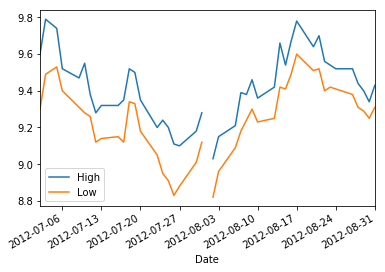

In [30]:
f['2012-07':'2012-08'][['High', 'Low']].plot()

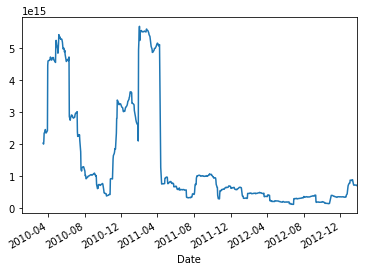

In [31]:

# Is the variance of the trading volume relatively stable over time?
r = f.rolling(50).var()['Volume'].plot()

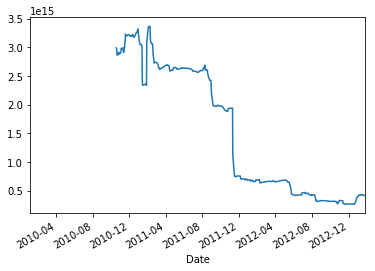

In [32]:
r = f.rolling(200).var()['Volume'].plot()

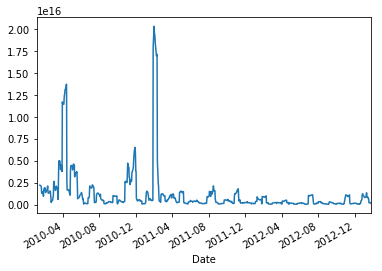

In [33]:
r = f.rolling(10).var()['Volume'].plot()

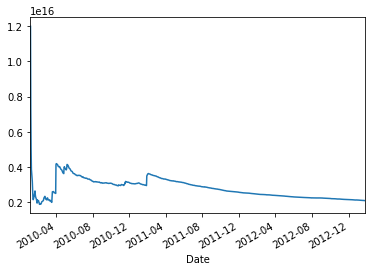

In [34]:
r = f.expanding().var()['Volume'].plot()

In [35]:
# On how many days did the stock close higher than it opened?
len(f[f.Close > f.Open])

350

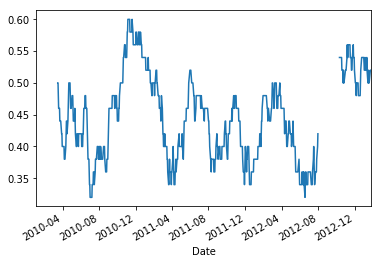

In [36]:
# Did the 'up' days become more or less frequent over time?
f['DayGain'] = f.Close - f.Open
f.rolling(window=50)['DayGain'].apply(lambda x: len([x_i for x_i in x if x_i > 0])/len(x)).plot()

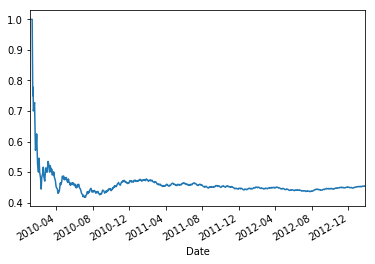

In [37]:
f.expanding()['DayGain'].apply(lambda x: len([x_i for x_i in x if x_i > 0])/len(x)).plot()

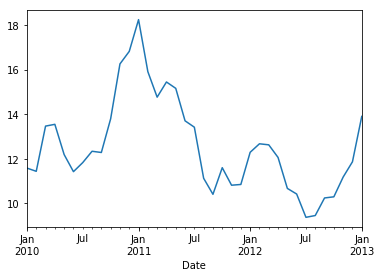

In [38]:
# Compute and plot the mean monthly high value of the stock
f.resample('M')['High'].mean().plot()

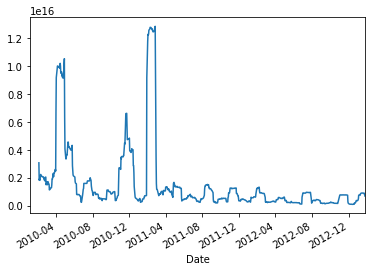

In [39]:
# Explore the variance of the differenced volume
volume = f.Volume
volume_lagged = f.Volume.shift()
diffed_volume = volume - volume_lagged
diffed_volume.rolling(window=20).var().plot()

In [40]:
# Does the lagged time series correlate with itself?
pd.DataFrame({'real':f.Volume, 'lagged':f.Volume.shift()}).corr()

,lagged,real
lagged,1.000000,0.649776
real,0.649776,1.000000
